**Personal note:** I was inspired to create this jupyter notebook while I was working on a project within a statistics and hypothesis testing module, from the following [Machine Learning/Data Science course](https://www.codecademy.com/career-journey/data-scientist-ml). I elected to slightly modify the narrative in order to focus more on the analysis and skills used to derive the insights. In addition to this, I incorporated data visualization into the project, even though it was not a requirement. Given my interest in data visualization, I thought it was a good opportunity to further practice these skills as well. For these reasons, I have decided to include this project in my [Data Science portfolio](https://www.distractedbydata.com).

---

# Optimizing Revenue through Price Point Selection for Microtransactions

Objective: The core objective of this project is to draw meaningful, actionable decisions from A/B testing data Brian collected, who is a hypothetical grocery store owner. He needs help determining the next product to upsell at checkout in his store. This determination is crucial for ensuring his business remains profitable and sustainable.

Brian, the owner of "HealthyHarvest," has implemented an A/B test involving three distinct product groups for his grocery store, denoted as 'A', 'B', and 'C'. Each group represents a different product that was offered as an upsell at checkout: Group 'A' is apples, Group 'B' is bananas, and Group 'C' is chocolates.

My aim is to ensure that the chosen product contributes at least $1,000 weekly towards the store's revenue. Brian has specified this amount as the baseline revenue needed to cover the costs associated with the product's import and stocking.

Data: The dataset, 'clicks.csv', includes:

- `user_id`: a unique id for each customer
- `group`: the product group to which the customer's choice belongs (A, B, or C)
- `is_purchase`: whether the customer made a purchase (Yes or No)

Outcome: Based on the analysis, which product should Brian choose to upsell at checkout in his store to maximize the chances of meeting or exceeding the target weekly revenue?

---

## 1. Data Loading and Initial Inspection

The first step of my analysis is to load the provided data and perform an initial inspection. The data comes from a CSV file named clicks.csv and includes the following columns:

I will load this data into a pandas DataFrame and use the head() method to display the first few rows. This will give a sense of the data structure and allow me to confirm that the data has been loaded correctly.

> Note: I am using the pandas library to load and manipulate the data. The numpy library will be used for numerical operations, while the scipy.stats library will be used for statistical tests.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, binomtest
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
colors = ["#377eb8",
          "#ff7f00",
          "#999999"]

# Load data
abdata = pd.read_csv('clicks.csv')

# Preview data
abdata.head()

,user_id,group,is_purchase
0,8e27bf9a,A,No
1,eb89e6f0,A,No
2,7119106a,A,No
3,e53781ff,A,No
4,02d48cf1,A,Yes


Question: Are all sample groups of equal size? Let's verify this by counting the number of users in each group.

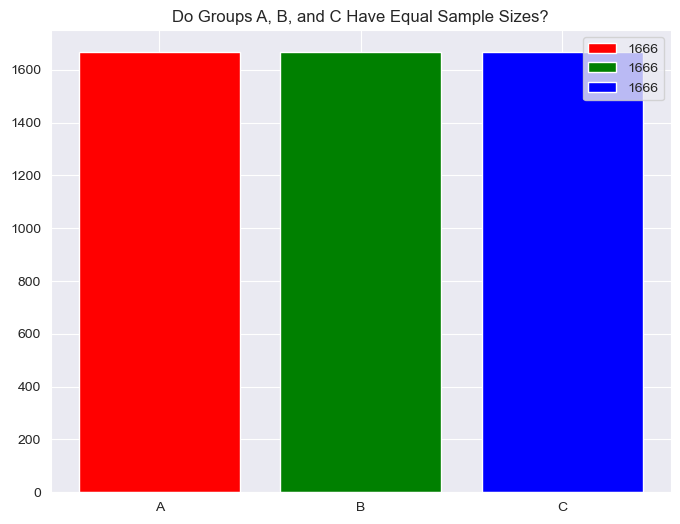

In [2]:
fig = plt.subplots(1,
                   1,
                   figsize=(8,6))

group_counts = abdata['group'].value_counts()
colors=['red',
        'green',
        'blue']
plt.bar(['A',
         'B',
         'C'],
        group_counts,
        color=colors,
        label=group_counts.to_list())
plt.title("Do Groups A, B, and C Have Equal Sample Sizes?")
plt.legend()

plt.show()

Fortunatley Brian was able to keep each group the same size (1666 people in each sample) which is good to confirm before conducting analysis.

## 2. Chi-Square Test of Independence 

The Chi-square test of independence is a statistical test to determine if there is a significant association between two categorical variables. In this context, we will use it to establish whether there's a significant relationship between the type of product the customer was shown ('A', 'B', or 'C') and their purchase decision (`is_purchase`).

Before we perform the chi-square test, I will visually plot the counts to aid with interpreting the data. For this, I will use a heatmap. Heatmaps help to compare high counts in each binary category (`is_purchase`: Yes or No) between the three product groups ('A', 'B', 'C'). It will provide a visual representation of how different products may affect purchasing behaviors. By observing the color patterns on the heatmap, we can preliminarily infer which product has a higher probability of being purchased, thus contributing more to the store's revenue.

In [3]:
# Create contingency table
Xtab = pd.crosstab(abdata['group'],
                   abdata['is_purchase'])

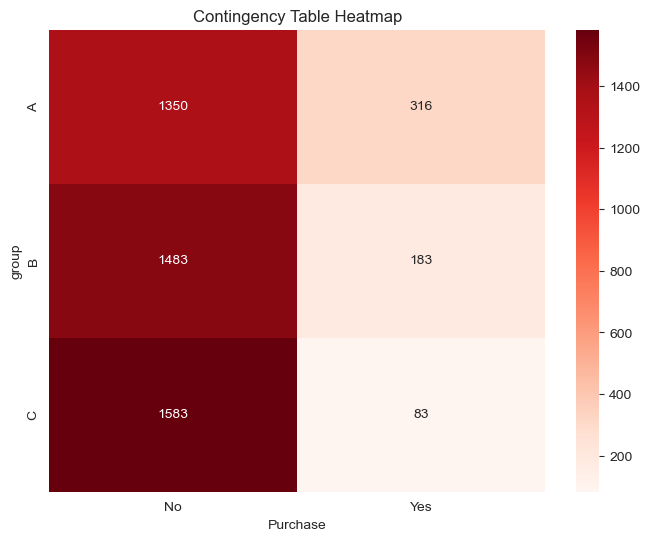

In [4]:
fig = plt.subplots(1,
                   1,
                   figsize=(8, 6))
sns.heatmap(Xtab,
            annot=True,
            fmt='d',
            cmap='Reds')
plt.title('Contingency Table Heatmap')
plt.xlabel('Purchase')

plt.show()

It seems that Group A is purchasing the chosen product at the highest rate!

To statistically validate this observation, I will now perform the Chi-square test of independence. Even though the heatmap already suggests a clear preference, this test will help us determine with statistical certainty whether there is a significant association between the product type offered at checkout and the likelihood of a purchase. This can indicate if the groups exhibited different purchasing behaviors based on the product they were offered.

The null hypothesis (H0) is that there is no relationship between the product type and the likelihood of a purchase, meaning the groups exhibited similar purchasing behaviors. The alternative hypothesis (H1), on the other hand, posits that there is a relationship, meaning the product type significantly affects whether a purchase is made.

I will perform the Chi-square test and store the resulting p-value in a variable named 'pval', and then print the result. I will use a significance threshold (α) of 0.05 to decide whether to reject the null hypothesis.

If the p-value ≤ 0.05, I will reject the null hypothesis, thus concluding that there is a significant difference in the purchase rates across the groups. This would mean the type of product offered at checkout significantly influences the likelihood of a purchase. Conversely, if the p-value > 0.05, I will not reject the null hypothesis, concluding that there is insufficient evidence to suggest a difference in purchase rates across the product groups.

> Note: I will use the pd.crosstab() function to generate this table, and the chi2_contingency() function from the scipy.stats module to perform the Chi-square test.

In [5]:
# Chi-square test of independence
chi2, p_val, dof, expected = chi2_contingency(Xtab)

# Print result
print(f"p-value = {p_val},\
Significant? {'Yes' if p_val < 0.05 else 'No'}")

p-value = 2.4126213546684264e-35,Significant? Yes


**The p-value of 2.4126213546684264e-35 is extremely small. After interpreting the heatmap contingency table, the Chi-square test of independence has confirmed my suspicions - there is indeed a significant association between the product type offered at checkout and the likelihood of a purchase.**

## 3. Reporintg Back to Brian

After conducting the Chi-square test, I decided to discuss my findings with the stakeholder, Brian.

My Conversation with Brian:

Me: "Hi Brian, can you tell me more about the experiment you were running?"

Brian: "Sure, we are trying to increase the sales at our grocery store by offering customers a small, additional product at checkout. We call it the upsell item. We're unsure about which product to select for it, so we've tested three different products: apples for group 'A', bananas for group 'B', and chocolates for group 'C'. Each product is offered at a different price: apples for \\$0.99, bananas for $1.99, and chocolates for \\$4.99. From our tests, it appears that significantly more people bought the apple when offered at checkout, so that's the product we're considering."

**It seems I acted too soon with the Chi-Square test!** It wasn't necessarily the best fit for this problem.

While it's true that more people might be inclined to purchase the apples, this doesn't necessarily equate to higher revenue. This is particularly important considering the varying prices of the products. What I really need to determine is whether each product, at its specific price point, will generate enough revenue to meet Brian's target.

Me: "Brian, do you have an idea of how much revenue you'd need to generate to justify this upsell initiative?"

Brian: "I'd estimate that we'd need to make a minimum of $1000 per week from this upsell item to cover its procurement and stocking costs."

### That gives me a clearer target to aim for.

---

## 4. Calculating Purchase Rates and Revenues

To justify the cost of this upsell initiative, I must calculate the necessary purchase rate for each product at its specific price point. Starting with the total weekly customers at the store, we know Brian ran his original test over a week, implying the number of customers in our dataset represents a typical week's customer count.

First, I will calculate the total number of store customers from the data and save the value in a variable named `num_visits`.

In [6]:
num_visits = len(abdata)
print(num_visits)

4998


I know the number of weekly customers (`num_visits`) is 4998. Now, I need to calculate the number of customers who would need to purchase each product at their respective price points (apples for \\$0.99, bananas for \\$1.99, and chocolates for \\$4.99) to generate Brian’s minimum revenue target of $1,000 per week.

Let's calculate the number of sales that would be needed to reach \\$1,000 of revenue at each price point and print out the results.

In [7]:
target = 1000
num_sales_needed_099 = np.ceil(target/0.99)
num_sales_needed_199 = np.ceil(target/1.99)
num_sales_needed_499 = np.ceil(target/4.99)

num_sales_needed_099,\
num_sales_needed_199,\
num_sales_needed_499

(1011.0, 503.0, 201.0)

Now I will plot the results visually.

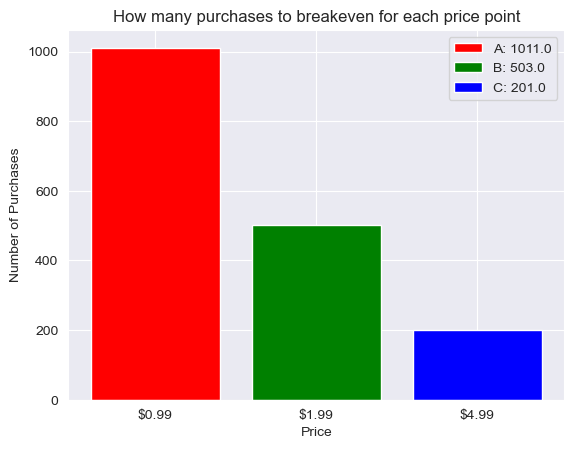

In [8]:
x = ('$0.99',
     '$1.99',
     '$4.99')
y = [num_sales_needed_099,
     num_sales_needed_199,
     num_sales_needed_499]

labels = {'A': y[0], 'B': y[1], 'C': y[2]}
legend_entries = [f'{key}: {value}' for\
                  key, value in labels.items()]

plt.bar(x,
        y,
        color=colors,
        label=labels)
plt.title("How many purchases to breakeven for each price point")
plt.xlabel('Price')
plt.ylabel('Number of Purchases')
plt.legend(legend_entries)

plt.show()

Knowing the required number of sales, I can calculate the proportion of weekly visitors who would need to make a purchase in order to meet that goal.

In [9]:
p_sales_needed_099 = num_sales_needed_099/num_visits
p_sales_needed_199 = num_sales_needed_199/num_visits
p_sales_needed_499 = num_sales_needed_499/num_visits

print(f"The proportion of weekly visitors to \
break even if Brian prices the product at $0.99 is {p_sales_needed_099}")
print(f"The proportion of weekly visitors to \
break even if Brian prices the product at $1.99 is {p_sales_needed_199}")
print(f"The proportion of weekly visitors to \
break even if Brian prices the product at $4.99 is {p_sales_needed_499}")

The proportion of weekly visitors to break even if Brian prices the product at $0.99 is 0.20228091236494597
The proportion of weekly visitors to break even if Brian prices the product at $1.99 is 0.10064025610244097
The proportion of weekly visitors to break even if Brian prices the product at $4.99 is 0.040216086434573826


With the known proportions, I will now visualize the observed versus required purchase rates across all three groups. 

This visualization will aid in identifying potential trends or variations, which can be further confirmed through conducting a binomial test.

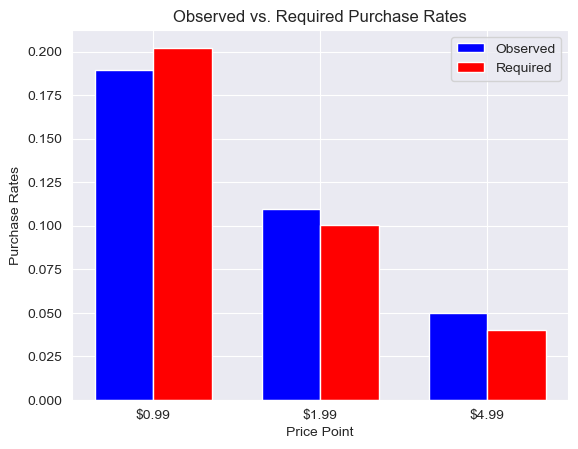

In [10]:
sales_099 = abdata[(abdata['group'] == 'A')\
                   & (abdata['is_purchase'] == 'Yes')].shape[0]
sales_199 = abdata[(abdata['group'] == 'B')\
                   & (abdata['is_purchase'] == 'Yes')].shape[0]
sales_499 = abdata[(abdata['group'] == 'C')\
                   & (abdata['is_purchase'] == 'Yes')].shape[0]
samp_size = 1666

observed_rate_099 = sales_099 / samp_size
observed_rate_199 = sales_199 / samp_size
observed_rate_499 = sales_499 / samp_size

y_observed = [observed_rate_099,
              observed_rate_199,
              observed_rate_499]
y_required = [p_sales_needed_099,
              p_sales_needed_199,
              p_sales_needed_499]


fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(x))

bar1 = ax.bar(index,
              y_observed,
              bar_width,
              color='b',
              label='Observed')
bar2 = ax.bar(index + bar_width,
              y_required,
              bar_width,
              color='r',
              label='Required')

ax.set_xlabel('Price Point')
ax.set_ylabel('Purchase Rates')
ax.set_title('Observed vs. Required Purchase Rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x)
ax.legend()
plt.show()

It is interesting to note that despite Group A (apples) having the highest number of observed purchases and initially appearing as the clear winner when examining the original contingency table, it is the only sample group with a lower observed purchase rate than what is required to breakeven.

Now, I am ready to address Brian's question, which aims to determine if the percentage of any group (A, B, or C) that purchased the upsell product is significantly higher than the proportion of weekly customers required to achieve \\$1000 in revenue per week.

To answer this using statistical analysis instead of visual methods, I will focus on the customers within each group individually and compare the number of purchases to the required proportion of sales. This analysis will be performed for all three groups.

In this scenario, a suitable statistical test to examine the purchase rates for each product group is a binomial test because it is specifically designed to analyze binary outcomes, such as whether a customer made a purchase (success) or did not make a purchase (failure).

In [11]:
pvalueA = binomtest(sales_099,samp_size,
                    p_sales_needed_099,
                    'greater')
pvalueA

BinomTestResult(k=316, n=1666, alternative='greater', statistic=0.18967587034813926, pvalue=0.9058887362654593)

In [12]:
pvalueB = binomtest(sales_199,samp_size,
                    p_sales_needed_199,
                    'greater')
pvalueB

BinomTestResult(k=183, n=1666, alternative='greater', statistic=0.10984393757503001, pvalue=0.11441815431122217)

In [13]:
pvalueC = binomtest(sales_499,samp_size,
                    p_sales_needed_499,
                    'greater')
pvalueC

BinomTestResult(k=83, n=1666, alternative='greater', statistic=0.04981992797118848, pvalue=0.029642608610084057)

Now to visualize the results!

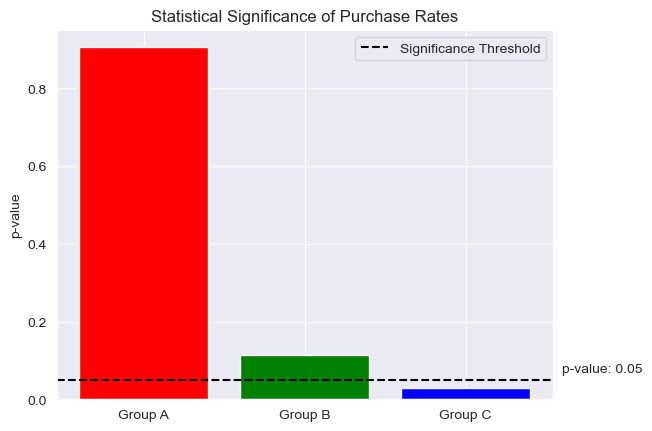

In [14]:
groups = ['Group A',
          'Group B',
          'Group C']
p_values = [pvalueA.pvalue,
            pvalueB.pvalue,
            pvalueC.pvalue]

plt.bar(groups,
        p_values,
        color=colors)
plt.ylabel('p-value')
plt.text(2.6,0.07,
         s="p-value: 0.05")
plt.axhline(0.05,
            color='black',
            linestyle='--',
            label='Significance Threshold')
plt.title('Statistical Significance of Purchase Rates')
plt.legend(loc='upper right')

plt.show()

## 5. Final Recommendation

Based on the results of the binomial tests conducted for each product group and considering a significance threshold of 0.05, I can determine the appropriate product for Brian to import next.

The visualization of each p-value, compared to the visual p-value threshold of 0.05, further aids in interpreting the binomial test results. It concludes that only Group C (chocolates) has a statistically significant finding.

### My recommendation:

Among the three products tested, only the chocolates (Group C) demonstrates a significantly higher purchase rate compared to the required purchase rate. This suggests that importing chocolates would be the most profitable option for Brian.

Therefore, I recommend Brian chooses chocolates as the product to offer his customers as an upsell, based on the observed sales rate and the goal of generating more than \\$1000 per week in revenue.